# 기초 사용법

opencv tutorial : https://docs.opencv.org/4.6.0/d6/d00/tutorial_py_root.html

In [1]:
import cv2

In [2]:
cv2.__version__

'4.6.0'

## Hello World

In [3]:
img = cv2.imread('./data/lenna.bmp')

print(type(img), img.shape)

cv2.namedWindow('image')   # 생략 가능
cv2.imshow('image', img)

cv2.waitKey()
cv2.destroyAllWindows()

<class 'numpy.ndarray'> (512, 512, 3)


In [4]:
img.min(), img.max()

(3, 255)

In [5]:
img[0][0]

array([125, 137, 226], dtype=uint8)

## 영상 파일 읽고 화면에 표시하기

In [6]:
# Color Mode로 이미지 읽기
imgColor = cv2.imread('./data/lenna.bmp', cv2.IMREAD_COLOR)

# GrayScale Mode로 이미지 읽기
imgGray = cv2.imread('./data/lenna.bmp', cv2.IMREAD_GRAYSCALE)

# type, shape 출력
print(type(imgColor), type(imgGray), imgColor.shape, imgGray.shape)

# 윈도우에 보여주기
cv2.imshow('image1', imgColor)
cv2.imshow('image2', imgGray)

# 창닫기
cv2.waitKey()
cv2.destroyAllWindows()

<class 'numpy.ndarray'> <class 'numpy.ndarray'> (512, 512, 3) (512, 512)


## 영상 파일 읽고 저장하기

In [7]:
# Color Mode로 이미지 읽기
imgColor = cv2.imread('./data/lena.jpg', cv2.IMREAD_COLOR)
print(type(imgColor), imgColor.shape)

cv2.imwrite('./out/lena.bmp', imgColor)
cv2.imwrite('./out/lena.png', imgColor)

cv2.imwrite('./out/lena2.png', imgColor, [cv2.IMWRITE_PNG_COMPRESSION, 5]) # 숫자가 클수록 압축이 많이 됨(0 ~ 9)
cv2.imwrite('./out/lena2.jpg', imgColor, [cv2.IMWRITE_JPEG_QUALITY, 90]) # 0 ~ 100

cv2.imshow('img color', imgColor)
cv2.waitKey()
cv2.destroyAllWindows()

<class 'numpy.ndarray'> (512, 512, 3)


## matplotlib으로 컬러 영상 표시

In [2]:
import matplotlib.pyplot as plt

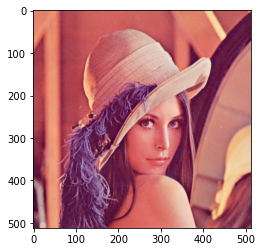

In [9]:
# matplotlib으로 이미지 읽고 보여주기
img_m = plt.imread('./data/lena.jpg')
plt.imshow(img_m)

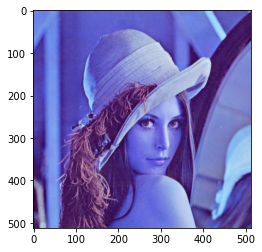

In [10]:
img_c = cv2.imread('./data/lena.jpg')
plt.imshow(img_c)

In [11]:
img_m[0][0], img_c[0][0]  # cv2가 이미지를 읽는 순서는 B->G->R, matplotlib은 R->G->B

(array([225, 138, 128], dtype=uint8), array([128, 138, 225], dtype=uint8))

In [12]:
img_c = cv2.imread('./data/lena.jpg')
cv2.imshow('img color', img_c)
cv2.waitKey()
cv2.destroyAllWindows()

* (1) cvtColor 함수를 컬러 채널을 변경후 표시

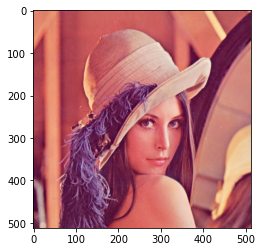

In [13]:
img_bgr = cv2.imread('./data/lena.jpg')   # img_bgr에는 BGR의 순서로 데이터가 준비되어 있음
# 현재 채널 공간(channel space)이 BGR인데 RGB로 바꿈
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

* (2) numpy ndarray의 색인 문법으로 컬러 채널 순서를 변경

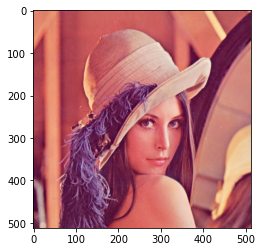

In [14]:
img_bgr = cv2.imread('./data/lena.jpg')   # img_bgr에는 BGR의 순서로 데이터가 준비되어 있음
# 현재 채널 공간(channel space)이 BGR인데 RGB로 바꿈
# option 1
img_rgb = img_bgr.copy()
img_rgb[:, :, [0, 2]] = img_bgr[:, :, [2, 0]]

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

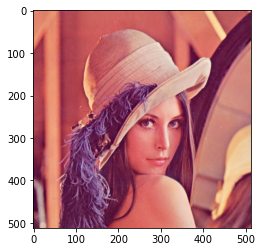

In [15]:
img_bgr = cv2.imread('./data/lena.jpg')   # img_bgr에는 BGR의 순서로 데이터가 준비되어 있음
# 현재 채널 공간(channel space)이 BGR인데 RGB로 바꿈
# option 2
img_rgb = img_bgr.copy()
img_rgb[:, :, 0] = img_bgr[:, :, 2]
img_rgb[:, :, 2] = img_bgr[:, :, 0]

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

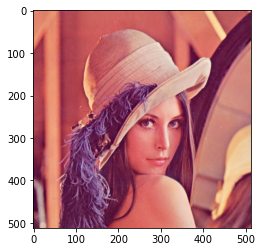

In [16]:
img_bgr = cv2.imread('./data/lena.jpg')   # img_bgr에는 BGR의 순서로 데이터가 준비되어 있음
# 현재 채널 공간(channel space)이 BGR인데 RGB로 바꿈
# option 3
img_rgb = img_bgr.copy()
img_rgb = img_bgr[:, :, -1::-1]

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

# 동영상 파일 다루기

```
객체 = 비디오 객체 생성

while True:
    배열 = 객체.read() # 배열 한장이 이미지 한장 (shape: w, h, c)
    배열 보여주기 (재생)
    배열 저장하기 (녹화)
    
    키 기다리다 조건에 맞으면
        break;
창닫기
```

In [ ]:
cap = cv2.VideoCapture(device)  # 카메라 디바이스
cap = cv2.VideoCapture(filepath) # 동영상 파일
cap = cv2.VideoCapture(url)     # 스트리밍 주소

## 카메라 입력

In [3]:
import sys

In [5]:
cap = cv2.VideoCapture(0)   # 0: main camera

if not cap.isOpened():
    print('Camera open failed!')
    sys.exit()
    
while True:
    ret, frame = cap.read()  # frame은 이미지 한장
    
    if not ret:
        print('frame read error')
        break
        
    cv2.imshow('camera', frame)
    
    key = cv2.waitKey(10)  # ESC Key (27), 10ms 기다리기 - sleep 효과
    if key == 32:
        break;
        
if cap.isOpened():
    print('cap release!')
    cap.release()
        
cv2.destroyAllWindows()

cap release!


## 동영상 파일

In [6]:
!dir data

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 3A54-31BE

 C:\Users\Playdata\Documents\인공지능 25기\Computer Vision\data 디렉터리

2022-12-12  오전 10:40    <DIR>          .
2022-12-12  오전 10:40    <DIR>          ..
2022-12-12  오전 10:37           720,056 airplane.bmp
2022-12-12  오전 10:37           263,222 alphabet.bmp
2022-12-12  오전 10:37            50,728 box.png
2022-12-12  오전 10:37           122,490 box_in_scene.png
2022-12-12  오전 10:37            79,718 building.jpg
2022-12-12  오전 10:37            44,746 butterfly.jpg
2022-12-12  오전 10:37           538,711 candies.png
2022-12-12  오전 10:37           921,656 card.bmp
2022-12-12  오전 10:37           921,654 cat.bmp
2022-12-12  오전 10:37            28,288 circles.jpg
2022-12-12  오전 10:37         1,440,056 circuit.bmp
2022-12-12  오전 10:37            45,995 coins.png
2022-12-12  오전 10:37           161,078 contours.bmp
2022-12-12  오전 10:37            19,992 crystal.bmp
2022-12-12  오전 10:37           721,129 digits.png
2022-12-12  오전 10:37           196,664 dog.b

In [6]:
cap = cv2.VideoCapture('./data/stopwatch.avi')   # 0: main camera

if not cap.isOpened():
    print('Camera open failed!')
    sys.exit()
    
w = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
h = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
fps = cap.get(cv2.CAP_PROP_FPS) # frame per second

delay = round(1000 / fps)  # 1000 / 30

while True:
    ret, frame = cap.read()  # frame은 이미지 한장
    
    if not ret:
        print('frame read error')
        break
        
    cv2.imshow('camera', frame)
    
    key = cv2.waitKey(delay)
    if key == 32:
        break;
        
if cap.isOpened():
    print('cap release!')
    cap.release()
        
cv2.destroyAllWindows()

frame read error
cap release!


## 동영상 저장

In [8]:
cap = cv2.VideoCapture('./data/stopwatch.avi')   # 0: main camera

if not cap.isOpened():
    print('Camera open failed!')
    sys.exit()
    
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS) # frame per second

delay = round(1000 / fps)  # 1000 / 30

fourcc = cv2.VideoWriter_fourcc('D', 'I', 'V', 'X')  # DivX Mpeg-4 코덱
# fourcc = cv2.VideoWriter_fourcc(*'DIVX')

# 저장을 위한 객체 = cv2.VideoWriter(파일명, 코덱, FPS, 해상도)
outputVideo = cv2.VideoWriter('./out/output.avi', fourcc, fps, (w, h))

while True:
    ret, frame = cap.read()  # frame은 이미지 한장
    
    if not ret:
        print('frame read error')
        break
        
    cv2.imshow('camera', frame)   # 재생
    outputVideo.write(frame)     # 녹화
    
    key = cv2.waitKey(delay)
    if key == 32:
        break;
        
if cap.isOpened():
    print('cap release!')
    cap.release()
        
cv2.destroyAllWindows()

cap release!


## 드로이드캠 영상

In [9]:
cap = cv2.VideoCapture('http://192.168.80.235:4747/mjpegfeed')   # 드로이드캠 연결 IP

if not cap.isOpened():
    print('Camera open failed!')
    sys.exit()
    
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS) # frame per second

delay = round(1000 / fps)  # 1000 / 30

fourcc = cv2.VideoWriter_fourcc('D', 'I', 'V', 'X')  # DivX Mpeg-4 코덱
# fourcc = cv2.VideoWriter_fourcc(*'DIVX')

# 저장을 위한 객체 = cv2.VideoWriter(파일명, 코덱, FPS, 해상도)
outputVideo = cv2.VideoWriter('./out/output.avi', fourcc, fps, (w, h))

while True:
    ret, frame = cap.read()  # frame은 이미지 한장
    
    if not ret:
        print('frame read error')
        break
        
    cv2.imshow('camera', frame)   # 재생
    outputVideo.write(frame)     # 녹화
    
    key = cv2.waitKey(delay)
    if key == 32:
        break;
        
if cap.isOpened():
    print('cap release!')
    cap.release()
        
cv2.destroyAllWindows()

cap release!


## 유튜브 영상

In [4]:
import pafy
import youtube_dl

In [26]:
url = 'https://www.youtube.com/watch?v=9SmQOZWNyWE&list=RD9SmQOZWNyWE&index=3'
video = pafy.new(url)

In [27]:
print('title: ', video.title)

title:  BTS - "Permission to Dance" performed at the United Nations General Assembly | SDGs | Official Video


In [28]:
print('rating: ', video.rating)

rating:  None


In [29]:
print('duration: ', video.duration)

duration:  00:03:43


In [30]:
best = video.getbest()

In [31]:
print('download url: ', best.url)

download url:  https://rr2---sn-ab02a0nfpgxapox-bh2sd.googlevideo.com/videoplayback?expire=1670848494&ei=jsuWY6ahMK3L2roPrqa-mAU&ip=112.220.17.226&id=o-AHNAmGzx2KuKYzC7usWOAJmcvEKNOnqGFW9abkCA53NR&itag=18&source=youtube&requiressl=yes&mh=e9&mm=31%2C26&mn=sn-ab02a0nfpgxapox-bh2sd%2Csn-n4v7snl7&ms=au%2Conr&mv=m&mvi=2&pl=24&initcwndbps=760000&vprv=1&mime=video%2Fmp4&ns=LIheIsB9v4kOwszelDzLeD0J&cnr=14&ratebypass=yes&dur=223.445&lmt=1665478137806352&mt=1670826553&fvip=2&fexp=24001373%2C24007246&c=WEB&txp=5538434&n=_1_uNaZuS9TMFOnCc&sparams=expire%2Cei%2Cip%2Cid%2Citag%2Csource%2Crequiressl%2Cvprv%2Cmime%2Cns%2Ccnr%2Cratebypass%2Cdur%2Clmt&sig=AOq0QJ8wRQIgJsaOqxCZQGUgTmrQoC9Du9xRfjpMCeHlww3e2XFLW8sCIQDsCwoCOI6zSAKu561WmZJX-Mx-cTxjNLdlvz6bVs-g6A%3D%3D&lsparams=mh%2Cmm%2Cmn%2Cms%2Cmv%2Cmvi%2Cpl%2Cinitcwndbps&lsig=AG3C_xAwRQIhAMMM8TB5l7MdbPfgIbakyd3SYL_S5WTDINFSDPUl_ZCEAiAygCnv11qIygQyhXM9zJFPgF-ObzavvvM5MDYWGsNIOg%3D%3D


In [32]:
print('resolution: ', best.resolution)

resolution:  640x360


In [35]:
cap = cv2.VideoCapture(best.url) #  유튜브 다운로드 URL

if not cap.isOpened():
    print("Camera open failed!")
    sys.exit()
    
w = cap.get(cv2.CAP_PROP_FRAME_WIDTH)    
h = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)    
fps = cap.get(cv2.CAP_PROP_FPS)   # frame per second
delay = round(1000/fps) # 1000/30 
print(delay)
    
while True:
    ret, frame = cap.read() # frame은 이미지 한장
    
    if not ret:
        print("frame read error")
        break
        
    cv2.imshow('origial', frame)
    cv2.imshow('inverse', 255 - frame)
    
    edge = cv2.Canny(frame, 100, 200)
    cv2.imshow('edge', edge)
    
  
    key = cv2.waitKey(delay) # ESC Key (27), 10ms 기다리기 (sleep 효과)
    if key == 32:
        break;
        
if cap.isOpened():
    print('cap release!')
    cap.release()
        
cv2.destroyAllWindows()   

33
cap release!


# 다양한 그리기 함수

In [5]:
import numpy as np

```
# numpy ndarray로 색인할 때는 행(수직방향)을 색인 -> 열(수평방향)을 색인
img[100, 50]      
# openCV 함수에서 좌표를 찾아갈 때는 x좌표(수평방향) -> y좌표(수직방향)
pt1 = (50, 100)     # x좌표 50, y좌표 100
```

## 직선 그리기

In [48]:
# np.full(사이즈, 초기값, 데이터타입)
img = np.full((400, 400, 3), 255, np.uint8)

pt1 = (50, 100) # x좌표, y좌표
pt2 = (150, 100) # x좌표, y좌표

cv2.line(img, pt1, pt2, (0, 0, 255), 2)

# 대각선
pt3 = (200, 100)
pt4 = (300, 150)
cv2.line(img, pt3, pt4, (0, 0, 255), 2, cv2.LINE_AA)



cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

## 도형 그리기

In [59]:
cv2.FILLED

-1

In [70]:
img = np.full((400, 400, 3), 255, np.uint8)

# rectangle
# cv2.rectangle(도화지, 시작점, 끝점, 색깔, 굵기)  # 시작점 끝점은 대각방향으로 마주보는 점
cv2.rectangle(img, (50, 50), (150, 100), (0, 0, 255), 3)
cv2.rectangle(img, (50, 150), (150, 300), (0, 0, 255), cv2.FILLED)  # 굵기 자리에 -1을 입력하면 내부가 채워짐

# circle
# cv2.circle(도화지, 중심점, 반지름, 색깔, 굵기...)
cv2.circle(img, (300, 120), 30, (255, 255, 0), 2)
cv2.circle(img, (300, 200), 30, (255, 255, 0), cv2.FILLED)

# elipse
# cv.ellipse(도화지, 중심점, 반지름쌍, 기울기, 시작각도, 끝각도, 색깔, 굵기)
cv2.ellipse(img, (100, 300), (60, 30), 0, 0, 360, (255, 0, 0), 3)

# polylines
# cv2.polylines(도화지, [다각형을 이룰 점들], 다각형을 닫을지 여부, 색깔, 굵기...)
pts = np.array([[250, 250], [300, 250], [300, 300], [350, 300], [350, 350], [250, 350]])
cv2.polylines(img, [pts], True, (255, 0, 255), 2)

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

## 문자열 출력하기

In [8]:
img = np.full((400, 400, 3), 255, np.uint8)

# text
# cv2.putText(도화지, 텍스트, 텍스트의 좌하단 좌표, 폰트, 스케일, 색깔, 굵기)
cv2.putText(img, 'Hello', (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 255), 2)

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

In [27]:
img1 = np.full((400, 400, 3), 255, np.uint8)

text = 'Hello, OpenCV'

fontFace = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 1
thickness = 1

size_Text, retVal = cv2.getTextSize(text, fontFace, fontScale, thickness)

print(size_Text)
print(img.shape)

org_x = (img.shape[1] - size_Text[0]) // 2
org_y = (img.shape[0] + size_Text[1]) // 2

org_x, org_y

cv2.putText(img1, text, (org_x, org_y), fontFace, fontScale, (255, 0, 0), thickness)
cv2.rectangle(img1, (org_x, org_y), (org_x + size_Text[0], org_y - size_Text[1]), (0, 255, 0), 2)
cv2.circle(img1, (org_x, org_y), 5, (25, 100, 255))

cv2.imshow('imgText', img1)

cv2.destroyAllWindows()

(219, 22)
(400, 400, 3)


## 실습: 카운트 다운 만들기

In [7]:
import time

In [12]:
img2 = np.full((400, 400, 3), 255, np.uint8)

circle_size = 200

for i in range(5, 0, -1):
    text = str(i)
    
    cv2.circle(img2, (200, 200), circle_size, (100, 100, 100), 2)
    cv2.putText(img2, text, (180, 220), cv2.FONT_HERSHEY_SIMPLEX, 2, (200, 200, 200), 2)
    
    circle_size -= 30
    
    cv2.imshow('countdown', img2)
    cv2.waitKey(1000)
    img2 = np.full((400, 400, 3), 255, np.uint8)
    
cv2.destroyAllWindows()